# Make Imports

In [342]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import numpy
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Prepare Data

In [343]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
n_samples, n_features

(569, 30)

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()   # recommended for logistic regression
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# to tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# change y dim
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [345]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([455, 30]),
 torch.Size([114, 30]),
 torch.Size([455, 1]),
 torch.Size([114, 1]))

# Create Model

In [346]:
# f(x) = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_hat = torch.sigmoid(self.linear(x))
        return y_hat

# Training Loop

In [347]:
EPOCHS = 10000
LEARNING_RATE = 1

# init model
model = LogisticRegression(n_features)

# init loss func and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

for epoch in range(EPOCHS):
    y_hat = model.forward(X_train)      # forward pass
    loss = criterion(y_hat, y_train)    # loss
    loss.backward()                     # backward pass
    optimizer.step()                    # update
    optimizer.zero_grad()               # zero grad

    if (epoch+1) % (EPOCHS/10) == 0:
        print(f'epoch {epoch+1}:, loss = {loss.item():.5f}')

epoch 1000:, loss = 0.02197
epoch 2000:, loss = 0.01812
epoch 3000:, loss = 0.01572
epoch 4000:, loss = 0.01394
epoch 5000:, loss = 0.01254
epoch 6000:, loss = 0.01140
epoch 7000:, loss = 0.01045
epoch 8000:, loss = 0.00965
epoch 9000:, loss = 0.00896
epoch 10000:, loss = 0.00837


# Accuracy

In [348]:
actual = y_test
predicted = model.forward(X_test).detach().numpy().round()
Accuracy = metrics.accuracy_score(actual, predicted)
print(f'Accuracy on test data: {100* Accuracy:.4f}%')

Accuracy on test data: 96.4912%


# Confusion Matrix

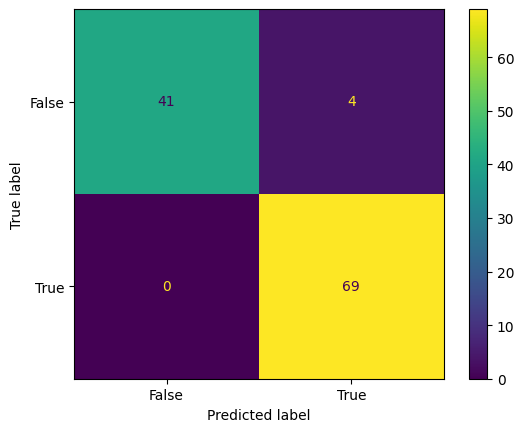

In [349]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()